# Drug synergy
- Bliss synergy paper: https://www.frontiersin.org/articles/10.3389/fphar.2017.00158/full


## Experiment design
Hey Abe, I believe I already shared some papers regarding Bliss synergy calculation with you. Synergy is showing whether or not drug A and drug B have greater killing than drug A alone + drug B alone

CTG stands for cell titer glo which is the luciferase assay used to measure killing

To perform the assay you dose in a grid with increased concentrations of drug A on the x axis and increased concentrations of drug B on the y axis

The visual representation you get from the data is a heat map

Which shows excess killing compared to what is expected from drug A alone + drug B alone

One way to plot the data is using the heat map

You can also present the numerical scores in a table format

HL-60 and KG-1 showed positive results, aka there was synergy between decitabine and RG3039

The other cell lines were negative

    hl60_bliss_mat_6x6.txt  kg1_bliss_mat_6x6.txt
    hl60_ctg_mat_6x6.txt    kg1_ctg_mat_6x6.txt
    hl60_ctg_mat_7x7.txt    kg1_ctg_mat_7x7.txt

These are the data used by the notebook to plot the heat maps

Since we only see positive data with HL60 and KG1

You can see if 6x6 or 7x7 looks better

I thought 6x6 was good

I can clean the tables, but it will have to be over Christmas break

In [41]:
ls synergy/*.txt

synergy/hl60_bliss_mat_6x6.txt  synergy/kg1_bliss_mat_6x6.txt
synergy/hl60_ctg_mat_6x6.txt    synergy/kg1_ctg_mat_6x6.txt
synergy/hl60_ctg_mat_7x7.txt    synergy/kg1_ctg_mat_7x7.txt


In [33]:
!ls synergy/ctg/raw_data_glomax

190216_hl60_d5.xls    190218_kg1_d7.xls
190216_kg1_d5.xls     190218_molm14_d7.xls
190216_molm14_d5.xls  190218_oci2_d7.xls
190216_oci2_d5.xls    190218_oci3_d7.xls
190216_oci3_d5.xls    190218_thp1_d7.xls
190216_thp1_d5.xls    190320_molm14_newdoses_n3_biological_reps_d5.xls
190218_hl60_d7.xls    190423_kasumi1_d5.xls


## Heatmap

In [6]:
%reload_ext rpy2.ipython

In [43]:
%%R 
library(ggplot2)
library(RColorBrewer)
library(viridis)
library(reshape2)
# library(ggthemes)

## ctg

### kg1

In [68]:
%%R 
kg1_ctg_mat_melt <- read.table('synergy/kg1_ctg_mat_6x6.txt', sep = '\t', header = TRUE, check.names = FALSE)

names(kg1_ctg_mat_melt)[1] <- 'dec_dose'

kg1_ctg_mat_melt

  dec_dose 0.000 0.010 0.040 0.160 0.630 2.500
1    0.167  0.89  0.90  0.90  0.93  0.93  0.94
2    0.056  0.78  0.81  0.81  0.85  0.87  0.91
3    0.019  0.61  0.66  0.67  0.74  0.83  0.88
4    0.006  0.32  0.37  0.42  0.54  0.75  0.83
5    0.002  0.13  0.16  0.23  0.41  0.66  0.80
6    0.000  0.00 -0.01  0.01  0.11  0.49  0.71


In [46]:
%%R 
kg1_ctg_mat_melt <- melt(kg1_ctg_mat_melt, id.vars = 'dec_dose')

kg1_ctg_mat_melt$dec_dose <- as.character(sprintf('%.3f', kg1_ctg_mat_melt$dec_dose))
kg1_ctg_mat_melt$variable <- as.factor(kg1_ctg_mat_melt$variable)

head(kg1_ctg_mat_melt)

  dec_dose variable value
1    0.167    0.000  0.89
2    0.056    0.000  0.78
3    0.019    0.000  0.61
4    0.006    0.000  0.32
5    0.002    0.000  0.13
6    0.000    0.000  0.00


In [47]:
%%R 
kg1_ctg_mat_melt$threshold <- ifelse(kg1_ctg_mat_melt$value < 0.4, 'under', 'over')

head(kg1_ctg_mat_melt)

  dec_dose variable value threshold
1    0.167    0.000  0.89      over
2    0.056    0.000  0.78      over
3    0.019    0.000  0.61      over
4    0.006    0.000  0.32     under
5    0.002    0.000  0.13     under
6    0.000    0.000  0.00     under


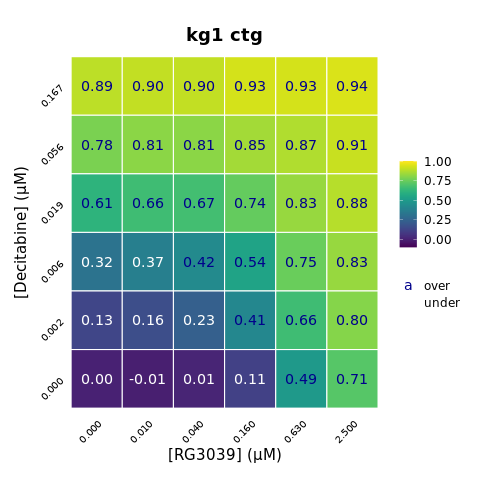

In [64]:
%%R 
p <- ggplot(kg1_ctg_mat_melt, aes(x = variable, y = dec_dose, fill = value, label = sprintf('%.2f', value))) +
geom_tile(color = 'white', size = 0.5) +
theme_minimal() + 
# theme_Publication() + 
geom_text(aes(color = threshold), size = 5) +
theme(plot.title = element_text(face = "bold",
                                         size = rel(1.2), hjust = 0.5),
      axis.text.x = element_text(size=10,color = 'black',angle = 45, hjust = 1),
      axis.text.y = element_text(size=10,color = 'black',angle = 45, hjust = 1),
      panel.grid.major = element_blank(),
      text = element_text(size=15),
      legend.title = element_blank(),
      plot.margin=unit(c(10,5,5,5),"mm"),
      legend.position = 'right'
     ) +
ggtitle('kg1 ctg') + 
scale_fill_viridis(limits = c(-0.1,1)) +
scale_color_manual(values = c('darkblue', 'white')) + 
xlab(expression('[RG3039] (' * mu * 'M)')) +
ylab(expression('[Decitabine] (' * mu * 'M)')) #+

ggsave('synergy/kg1_ctg_v2.pdf',width = 6, height = 5.5)

p 

### HL-60

In [66]:
%%R 
# import dose matrix
hl60_ctg_mat <- read.table('synergy/hl60_ctg_mat_6x6.txt', sep = '\t', header = TRUE, check.names = FALSE)

#rename first column
names(hl60_ctg_mat)[1] <- 'dec_dose'

#melt data using first column as id variable
hl60_ctg_mat_melt <- melt(hl60_ctg_mat, id.vars = 'dec_dose')

#convert decitabine doses (w three decimal places) to characters
hl60_ctg_mat_melt$dec_dose <- as.character(sprintf('%.3f', hl60_ctg_mat_melt$dec_dose))

#convert rg3039 doses to factor
hl60_ctg_mat_melt$variable <- as.factor(hl60_ctg_mat_melt$variable)

#create variable for value font color
hl60_ctg_mat_melt$threshold <- ifelse(hl60_ctg_mat_melt$value < 0.4, 'under', 'over')

head(hl60_ctg_mat_melt, n = 15)

   dec_dose variable value threshold
1     0.167    0.000 0.691      over
2     0.056    0.000 0.479      over
3     0.019    0.000 0.284     under
4     0.006    0.000 0.163     under
5     0.002    0.000 0.102     under
6     0.000    0.000 0.000     under
7     0.167    0.010 0.710      over
8     0.056    0.010 0.545      over
9     0.019    0.010 0.389     under
10    0.006    0.010 0.254     under
11    0.002    0.010 0.213     under
12    0.000    0.010 0.072     under
13    0.167    0.039 0.721      over
14    0.056    0.039 0.587      over
15    0.019    0.039 0.464      over


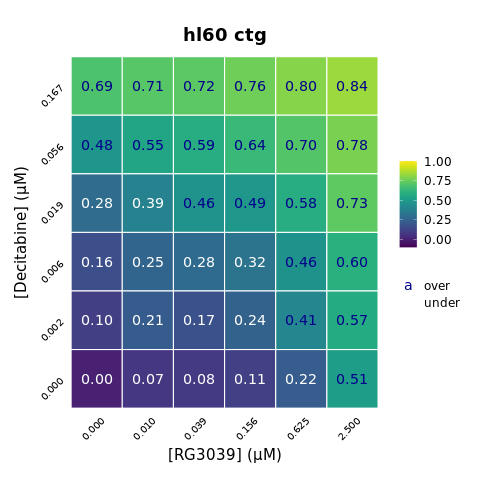

In [91]:
%%R 
p <- ggplot(hl60_ctg_mat_melt, aes(x = variable, y = dec_dose, fill = value, label = sprintf('%.2f', value))) +
geom_tile(color = 'white', size = 0.5) +
theme_minimal() + 
# theme_Publication() + 
geom_text(aes(color = threshold), size = 5) +
theme(plot.title = element_text(face = "bold",
                                         size = rel(1.2), hjust = 0.5),
      axis.text.x = element_text(size=10,color = 'black',angle = 45, hjust = 0.85),
      axis.text.y = element_text(size=10,color = 'black',angle = 45),# hjust = 0.1),
      panel.grid.major = element_blank(),
      text = element_text(size=15),
      legend.title = element_blank(),
      plot.margin=unit(c(10,5,5,5),"mm"),
      legend.position = 'right'
     ) +
ggtitle('hl60 ctg') + 
scale_fill_viridis(limits = c(-0.1,1)) +
scale_color_manual(values = c('darkblue', 'white')) + 
xlab(expression('[RG3039] (' * mu * 'M)')) +
ylab(expression('[Decitabine] (' * mu * 'M)')) #+


ggsave('synergy/hl60_ctg.pdf',width = 6, height = 5.5)

p

## bliss

### hl60

In [69]:
%%R 
#import dose matrix
hl60_bliss_mat <- read.table('synergy/hl60_bliss_mat_6x6.txt', sep = '\t', header = TRUE, check.names = FALSE)

#rename first column
names(hl60_bliss_mat)[1] <- 'dec_dose'

#melt data using first column as id variable
hl60_bliss_mat_melt <- melt(hl60_bliss_mat, id.vars = 'dec_dose')

#convert decitabine doses (w three decimal places) to characters
hl60_bliss_mat_melt$dec_dose <- as.character(sprintf('%.3f', hl60_bliss_mat_melt$dec_dose))

#convert rg3039 doses to factor
hl60_bliss_mat_melt$variable <- as.factor(hl60_bliss_mat_melt$variable)

#create variable for value font color
#hl60_ctg_mat_melt$threshold <- ifelse(hl60_ctg_mat_melt$value < 0.4, 'under', 'over')

head(hl60_bliss_mat_melt, n = 15)

   dec_dose variable  value
1     0.167    0.010 -0.003
2     0.056    0.010  0.028
3     0.019    0.010  0.054
4     0.006    0.010  0.031
5     0.002    0.010  0.046
6     0.167    0.039  0.005
7     0.056    0.039  0.065
8     0.019    0.039  0.121
9     0.006    0.039  0.048
10    0.002    0.039 -0.002
11    0.167    0.156  0.032
12    0.056    0.156  0.102
13    0.019    0.156  0.123
14    0.006    0.156  0.061
15    0.002    0.156  0.038


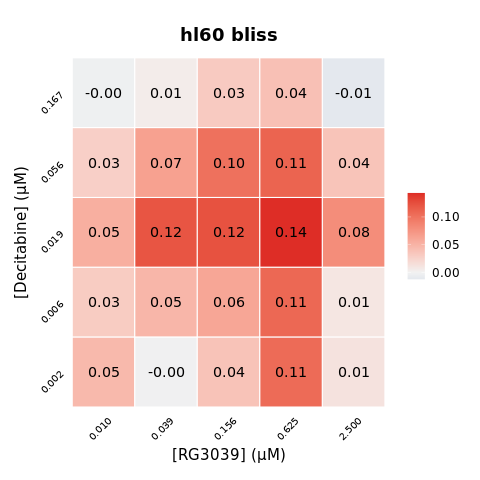

In [99]:
%%R 
p <- ggplot(hl60_bliss_mat_melt, aes(x = variable, y = dec_dose, fill = value, label = sprintf('%.2f', value))) +
geom_tile(color = 'white', size = 0.5) +
theme_minimal() +
theme(plot.title = element_text(face = "bold",
                                         size = rel(1.2), hjust = 0.5),
      axis.text.x = element_text(size=10,color = 'black',angle = 45, hjust = 0.85),
      axis.text.y = element_text(size=10,color = 'black',angle = 45),# hjust = 0.1),
      panel.grid.major = element_blank(),
      text = element_text(size=15),
      legend.title = element_blank(),
      plot.margin=unit(c(10,5,5,5),"mm"),
      legend.position = 'right'
     ) +
scale_fill_gradient2(low = '#3182bd', mid = 'gray95', high = '#de2d26', midpoint = 0) +
geom_text(size = 5) +
xlab(expression('[RG3039] (' * mu * 'M)')) +
ylab(expression('[Decitabine] (' * mu * 'M)')) +
ggtitle('hl60 bliss') + 
scale_color_manual(values = c('black', 'white'))

ggsave('synergy/hl60_bliss_v4.pdf',width = 6, height = 5.5)

p

### kg1

In [101]:
%%R 
#import dose matrix
kg1_bliss_mat <- read.table('synergy/kg1_bliss_mat_6x6.txt', sep = '\t', header = TRUE, check.names = FALSE)

#rename first column
names(kg1_bliss_mat)[1] <- 'dec_dose'

#melt data using first column as id variable
kg1_bliss_mat_melt <- melt(kg1_bliss_mat, id.vars = 'dec_dose')

#convert decitabine doses (w three decimal places) to characters
kg1_bliss_mat_melt$dec_dose <- as.character(sprintf('%.3f', kg1_bliss_mat_melt$dec_dose))

#convert rg3039 doses to factor
kg1_bliss_mat_melt$variable <- as.factor(kg1_bliss_mat_melt$variable)

#create variable for value font color
#kg1_ctg_mat_melt$threshold <- ifelse(kg1_ctg_mat_melt$value < 0.4, 'under', 'over')

head(kg1_bliss_mat_melt, n = 15)

   dec_dose variable value
1     0.167    0.010 0.008
2     0.056    0.010 0.032
3     0.019    0.010 0.055
4     0.006    0.010 0.050
5     0.002    0.010 0.039
6     0.167    0.039 0.008
7     0.056    0.039 0.022
8     0.019    0.039 0.056
9     0.006    0.039 0.088
10    0.002    0.039 0.090
11    0.167    0.156 0.024
12    0.056    0.156 0.043
13    0.019    0.156 0.095
14    0.006    0.156 0.140
15    0.002    0.156 0.178


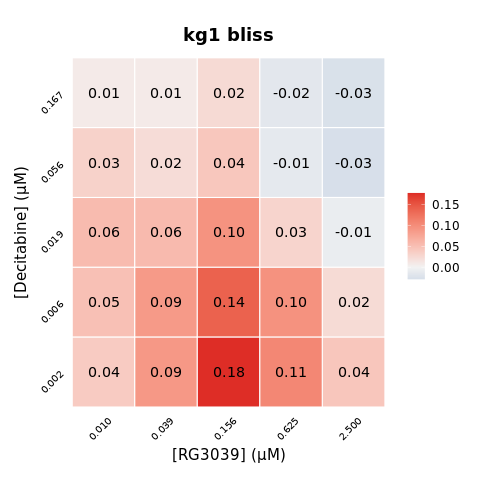

In [104]:
%%R 
p <- ggplot(kg1_bliss_mat_melt, aes(x = variable, y = dec_dose, fill = value, label = sprintf('%.2f', value))) +
geom_tile(color = 'white', size = 0.5) +
theme_minimal() +
theme(plot.title = element_text(face = "bold",
                                         size = rel(1.2), hjust = 0.5),
      axis.text.x = element_text(size=10,color = 'black',angle = 45, hjust = 0.85),
      axis.text.y = element_text(size=10,color = 'black',angle = 45),# hjust = 0.1),
      panel.grid.major = element_blank(),
      text = element_text(size=15),
      legend.title = element_blank(),
      plot.margin=unit(c(10,5,5,5),"mm"),
      legend.position = 'right'
     ) +
scale_fill_gradient2(low = '#3182bd', mid = 'gray95', high = '#de2d26', midpoint = 0) +
geom_text(size = 5) +
xlab(expression('[RG3039] (' * mu * 'M)')) +
ylab(expression('[Decitabine] (' * mu * 'M)')) +
ggtitle('kg1 bliss') + 
scale_color_manual(values = c('black', 'white'))

ggsave('synergy/kg1_bliss_v2.pdf',width = 6, height = 5.5)

p

In [105]:
# p <- ggplot(kg1_bliss_mat_melt, aes(x = variable, y = dec_dose, fill = value, label = sprintf('%.2f', value))) +
# geom_tile(color = NA) +
# theme_minimal() +
# xlab(expression('RG3039 (uM)')) +
# ylab(expression('Decitabine (uM)')) +
# theme(axis.text.x = element_text(size = rel(2), color = 'black', angle = 45, hjust = 1),
#       axis.text.y = element_text(size = rel(2), color = 'black'),
#       axis.title.x = element_text(size = rel(1.75), color = 'black'),
#       axis.title.y = element_text(size = rel(1.75), color = 'black'),
#       panel.grid.major = element_blank(),
#       legend.title = element_blank(),
#       legend.position = 'right',
#       legend.text = element_text(size = rel(1.5))) +
# scale_fill_gradient2(low = '#3182bd', mid = 'gray95', high = '#de2d26', midpoint = 0,
#                      guide = guide_colorbar(ticks.linewidth = 2, barheight = 10)) +
# scale_color_manual(values = c('black', 'white'))

# ggsave('kg1_bliss_v2.eps', width = 5.35, height = 4.4)

# p

In [106]:
%%R 
sessionInfo()

R version 3.6.0 (2019-04-26)
Platform: x86_64-redhat-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /data_gilbert/home/aarab/anaconda3/envs/down/lib/libmkl_rt.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] tools     stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
[1] viridis_0.5.1      viridisLite_0.4.0  reshape2_1.4.3     RColorBrewer_1.1-2
[5] ggplot2_3.3.3     

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.6       rstudioapi_0.13  magrittr_2.0.1   tidyselect_0.2.5
 [5] munsell_0.5.0    colorspace_2.0-1 R6_2.5.0         rlang_0.4.11

In [107]:
!date

Tue Dec 14 13:07:42 PST 2021
